In [24]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import os 
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import impyute as impy

In [25]:
# Read Training dataset
my_data = pd.read_csv('Final_dataset_testing_updated_eliminatedgages.csv', delimiter=",")
my_data[0:5]

,Gage ID,Falcone_Non_Falcone,Area,lat,lon,Ref_Non_Ref,Ref_Non_Ref_Binary,NABD Point Count,Polyline_Count,Concentration_area,...,Barren Land,Decidious Forest,Evergreen Forest,Mixed Forest,Shrub/Scrub,Herbaceous,Hay/Pasture,Cultivated Crops,Woody Wetlands,Emergent Herbaceous Wetlands
0,7227000,Falcone,29030.031871,35.357002,-103.418023,Non-ref,0,41,4916,0.001412,...,0.000157,0.005062,0.173590,0.000897,0.522264,0.272943,0.002177,0.003969,0.002712,0.006289
1,7227420,Falcone,245.445999,35.751256,-102.893176,Ref,1,0,26,0.000000,...,0.000191,0.000000,0.000000,0.000000,0.683538,0.235467,0.000007,0.069229,0.000004,0.000026
2,7227500,Falcone,49264.398438,35.470332,-101.879637,Non-ref,0,82,7959,0.001664,...,0.000329,0.003014,0.103596,0.000529,0.551900,0.276400,0.001666,0.043517,0.002059,0.004505
3,7232250,Falcone,2223.540039,36.629753,-102.681591,Non-ref,0,2,344,0.000899,...,0.000034,0.000034,0.022365,0.000035,0.280288,0.657019,0.000104,0.027770,0.000600,0.003935
4,7232470,Falcone,5515.770020,36.705864,-101.636836,Non-ref,0,3,647,0.000544,...,0.000081,0.000024,0.009015,0.000014,0.177963,0.579628,0.000795,0.209918,0.000260,0.002002


In [26]:
my_data.shape

(524, 68)

In [27]:
# Check for NAs
my_data.isnull().sum().sum()
# 4

4

In [28]:
# Remove columns 
X = my_data.drop(['Area','Falcone_Non_Falcone','Ref_Non_Ref','Gage ID', 'Ref_Non_Ref_Binary', 'lat', 'lon', 'NID Storage Summary'], axis=1)

# Interpolate NA values
X = X.interpolate()
# X = X.fillna(X.mean())
type(X)

pandas.core.frame.DataFrame

In [29]:
# X as the Feature Matrix (data of my_data)
X[0:5]

,NABD Point Count,Polyline_Count,Concentration_area,Concentration_length,Storage_area,sum_qe_ma,sum_Length_KILOMETERS,Degree_of_Regulation,WsAreaSqKm,CoalMineDensWs,...,Barren Land,Decidious Forest,Evergreen Forest,Mixed Forest,Shrub/Scrub,Herbaceous,Hay/Pasture,Cultivated Crops,Woody Wetlands,Emergent Herbaceous Wetlands
0,41,4916,0.001412,0.002811,44.083314,62069.289990,14586.373890,2.847539,28200.0,0.0,...,0.000157,0.005062,0.173590,0.000897,0.522264,0.272943,0.002177,0.003969,0.002712,0.006289
1,0,26,0.000000,0.000000,0.000000,30.622837,103.435704,0.000000,253.0,0.0,...,0.000191,0.000000,0.000000,0.000000,0.683538,0.235467,0.000007,0.069229,0.000004,0.000026
2,82,7959,0.001664,0.003689,26.618845,152252.853700,22226.266110,1.189548,47100.0,0.0,...,0.000329,0.003014,0.103596,0.000529,0.551900,0.276400,0.001666,0.043517,0.002059,0.004505
3,2,344,0.000899,0.001661,3.590221,1883.535928,1204.035507,0.585352,2260.0,0.0,...,0.000034,0.000034,0.022365,0.000035,0.280288,0.657019,0.000104,0.027770,0.000600,0.003935
4,3,647,0.000544,0.001562,1.457457,4291.357504,1920.167686,0.258721,5520.0,0.0,...,0.000081,0.000024,0.009015,0.000014,0.177963,0.579628,0.000795,0.209918,0.000260,0.002002


In [30]:
# y as the response vector (target)
y = my_data['Ref_Non_Ref_Binary']
y[0:5]

0    0
1    1
2    0
3    0
4    0
Name: Ref_Non_Ref_Binary, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Print the shapes of X_training and y_training data to determine the dimensions match
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

# Print the test sets 
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(y_testset.shape))

In [53]:
### Model Prediction
from sklearn.ensemble import RandomForestRegressor

# Instantation of the model
model = RandomForestRegressor (n_estimators = 30, random_state = 30, bootstrap = True,)

# fitting the model  
Reference_RF = model.fit(X_trainset, y_trainset)

In [54]:
# Training Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

ytrain_pred = Reference_RF.predict(X_trainset)

In [55]:
# Training rsquared
print('the training_rsq is: %.3f'% Reference_RF.score(X_trainset, y_trainset))
# Print MAE
print('The MAE is: %.3f'% mean_absolute_error(ytrain_pred, y_trainset))
# Print MSE
print('The MSE is: %.3f'% mean_squared_error(y_trainset, ytrain_pred))
# Print RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_trainset, ytrain_pred)))
# Print EVS
print ('The EVS is: %.3f'% explained_variance_score(y_trainset,ytrain_pred))

the training_rsq is: 0.900
The MAE is: 0.067
The MSE is: 0.015
The RMSE is: 0.122
The EVS is: 0.900


In [56]:
# Prediction on the testing data
ytest_pred = Reference_RF.predict(X_testset)

# Print Testing coef of determination
print('The testing r_sq is: %.3f'% r2_score(y_testset, ytest_pred))
# Print MAE
print('The MAE is: %.2f'% mean_absolute_error(y_testset, ytest_pred))
# Print MSE
print('The MSE is: %.4f'% mean_squared_error(y_testset, ytest_pred))
# Print RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_testset, ytest_pred)))
# Print EVS
print ('The EVS is: %.3f'% explained_variance_score(y_testset,ytest_pred))

The testing r_sq is: 0.397
The MAE is: 0.16
The MSE is: 0.0879
The RMSE is: 0.296
The EVS is: 0.401


In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [58]:
print(confusion_matrix(y_testset,ytest_pred.round()))
print(classification_report(y_testset,ytest_pred.round()))

accuracy = accuracy_score(y_testset,ytest_pred.round())*100
print('Accuracy:', round(accuracy,2),'%')

[[126   4]
 [ 18  10]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       130
           1       0.71      0.36      0.48        28

    accuracy                           0.86       158
   macro avg       0.79      0.66      0.70       158
weighted avg       0.85      0.86      0.84       158

Accuracy: 86.08 %


In [59]:
# K-fold CV
from sklearn.model_selection import cross_val_score
seed = 7
# Training model cv
score_train = cross_val_score(Reference_RF, X_trainset, y_trainset, scoring = 'neg_mean_squared_error', cv=10)

print(score_train)
print( score_train.mean())

[-0.04828829 -0.06714715 -0.08738739 -0.163003   -0.12153153 -0.06915916
 -0.13185185 -0.11067901 -0.10854938 -0.10833333]
-0.10159300967634302


In [60]:
# the absolue mean score
from numpy import absolute
print("Mean Score:", absolute(np.mean(score_train)*100))

Mean Score: 10.159300967634302


In [61]:
# Training model cv
score_test = cross_val_score(Reference_RF, X_testset, y_testset, scoring = 'neg_mean_squared_error', cv=10)
score_test

print(absolute(np.mean(score_test))*100)

array([-0.14881944, -0.12131944, -0.06409722, -0.083125  , -0.15555556,
       -0.19444444, -0.11618056, -0.07576389, -0.02014815, -0.07533333])

10.547870370370369


In [39]:
# Develop the Random forest
# Random Forest Feature Ranking
from sklearn.pipeline import Pipeline

In [40]:
f_list = list(X.columns)
f_importance = pd.Series(Reference_RF.feature_importances_, index = f_list).sort_values(ascending = False)

In [41]:
print(f_importance[0:10])

Storage_area                   0.162242
Developed, High Intensity      0.063893
PctUrbHi2001Ws                 0.062154
sum_Length_KILOMETERS          0.054530
PctUrbMd2001Ws                 0.048548
PS-Wtotl                       0.045550
Cultivated Crops               0.041224
IR-CUsFr                       0.031925
Developed, Medium Intensity    0.029133
Evergreen Forest               0.027159
dtype: float64


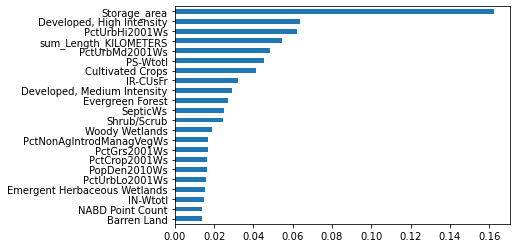

In [42]:
f_importance.nlargest(22).plot(kind='barh').invert_yaxis()

In [43]:
# Predict Random Forest onto Non-Falcone Dataset

In [44]:
# Read Training dataset
prediction_data = pd.read_csv('Final_dataset_fitting_updated_eliminatedgages.csv', delimiter=",")
prediction_data[0:5]

,Gage ID,Falcone_Non_Falcone,Area,lat,lon,Ref_Non_Ref,Ref_Non_Ref_Binary,NABD Point Count,Polyline_Count,Concentration_area,...,Barren Land,Decidious Forest,Evergreen Forest,Mixed Forest,Shrub/Scrub,Herbaceous,Hay/Pasture,Cultivated Crops,Woody Wetlands,Emergent Herbaceous Wetlands
0,7223000,Non_Falcone,18917.365234,35.402712,-104.185675,NaN,NaN,37,3395,0.001956,...,0.000207,0.007590,0.255967,0.001375,0.413717,0.292702,0.003336,0.002992,0.003555,0.008532
1,7223300,Non_Falcone,171.870651,35.375239,-104.167883,NaN,NaN,0,30,0.000000,...,0.000000,0.000293,0.037668,0.000000,0.920332,0.025725,0.000000,0.000000,0.000000,0.000445
2,7227200,Non_Falcone,1291.192627,36.070800,-103.202936,NaN,NaN,5,272,0.003872,...,0.000030,0.000000,0.016154,0.000000,0.630963,0.345929,0.000418,0.001815,0.000733,0.002991
3,7227448,Non_Falcone,3475.114014,35.667358,-102.481948,NaN,NaN,9,440,0.002590,...,0.000196,0.000003,0.006002,0.000000,0.599757,0.279394,0.000222,0.107636,0.000374,0.001533
4,7227470,Non_Falcone,46797.937500,35.519381,-102.260760,NaN,NaN,70,7435,0.001496,...,0.000310,0.003156,0.108984,0.000556,0.551496,0.273426,0.001713,0.043019,0.002101,0.004591


In [45]:
prediction_data.shape

(399, 68)

In [46]:
# Remove columns 
X_pred = prediction_data.drop(['Area','Falcone_Non_Falcone','Ref_Non_Ref','Gage ID', 'Ref_Non_Ref_Binary', 'lat', 'lon', 'NID Storage Summary'], axis=1)

# Check for NAs
X_pred.isnull().sum().sum()
# 14

4

In [47]:
# Interpolate NA values
X_pred = X_pred.interpolate()
# X = X.fillna(X.mean())
type(X_pred)

pandas.core.frame.DataFrame

In [48]:
# X as the Feature Matrix (data of my_data)
X_pred[0:5]

,NABD Point Count,Polyline_Count,Concentration_area,Concentration_length,Storage_area,sum_qe_ma,sum_Length_KILOMETERS,Degree_of_Regulation,WsAreaSqKm,CoalMineDensWs,...,Barren Land,Decidious Forest,Evergreen Forest,Mixed Forest,Shrub/Scrub,Herbaceous,Hay/Pasture,Cultivated Crops,Woody Wetlands,Emergent Herbaceous Wetlands
0,37,3395,0.001956,0.003549,46.323951,38958.702930,10425.832790,3.106611,18900.0,0.0,...,0.000207,0.007590,0.255967,0.001375,0.413717,0.292702,0.003336,0.002992,0.003555,0.008532
1,0,30,0.000000,0.000000,0.000000,25.069386,77.566028,0.000000,187.0,0.0,...,0.000000,0.000293,0.037668,0.000000,0.920332,0.025725,0.000000,0.000000,0.000000,0.000445
2,5,272,0.003872,0.007049,6.702329,680.877440,709.307941,1.755388,1300.0,0.0,...,0.000030,0.000000,0.016154,0.000000,0.630963,0.345929,0.000418,0.001815,0.000733,0.002991
3,9,440,0.002590,0.007364,2.599915,4360.062932,1222.169611,0.286194,3470.0,0.0,...,0.000196,0.000003,0.006002,0.000000,0.599757,0.279394,0.000222,0.107636,0.000374,0.001533
4,70,7435,0.001496,0.003316,27.905600,116428.102200,21110.112270,1.549121,45000.0,0.0,...,0.000310,0.003156,0.108984,0.000556,0.551496,0.273426,0.001713,0.043019,0.002101,0.004591


In [49]:
# y as the response vector (target)
y_pred = prediction_data['Ref_Non_Ref_Binary']
y_pred[0:5]

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Ref_Non_Ref_Binary, dtype: float64

In [50]:
Y_RF_Pred = Reference_RF.predict(X_pred)

In [51]:
df_new = pd.DataFrame({'x':Y_RF_Pred.round()}); 
print(df_new.head(100))

      x
0   0.0
1   1.0
2   1.0
3   0.0
4   0.0
..  ...
95  0.0
96  1.0
97  0.0
98  1.0
99  1.0

[100 rows x 1 columns]


In [52]:
df_proportion = pd.DataFrame({'x':Y_RF_Pred});
print(df_proportion.head(100))

           x
0   0.166667
1   0.600000
2   0.600000
3   0.433333
4   0.033333
..       ...
95  0.000000
96  0.666667
97  0.000000
98  0.766667
99  0.766667

[100 rows x 1 columns]


In [53]:
prediction_data['Random Forest Prediction'] = df_new
prediction_data['Random Forest Proportion'] = df_proportion
prediction_data.head()

,Gage ID,Falcone_Non_Falcone,Area,lat,lon,Ref_Non_Ref,Ref_Non_Ref_Binary,NABD Point Count,Polyline_Count,Concentration_area,...,Evergreen Forest,Mixed Forest,Shrub/Scrub,Herbaceous,Hay/Pasture,Cultivated Crops,Woody Wetlands,Emergent Herbaceous Wetlands,Random Forest Prediction,Random Forest Proportion
0,7223000,Non_Falcone,18917.365234,35.402712,-104.185675,NaN,NaN,37,3395,0.001956,...,0.255967,0.001375,0.413717,0.292702,0.003336,0.002992,0.003555,0.008532,0.0,0.166667
1,7223300,Non_Falcone,171.870651,35.375239,-104.167883,NaN,NaN,0,30,0.000000,...,0.037668,0.000000,0.920332,0.025725,0.000000,0.000000,0.000000,0.000445,1.0,0.600000
2,7227200,Non_Falcone,1291.192627,36.070800,-103.202936,NaN,NaN,5,272,0.003872,...,0.016154,0.000000,0.630963,0.345929,0.000418,0.001815,0.000733,0.002991,1.0,0.600000
3,7227448,Non_Falcone,3475.114014,35.667358,-102.481948,NaN,NaN,9,440,0.002590,...,0.006002,0.000000,0.599757,0.279394,0.000222,0.107636,0.000374,0.001533,0.0,0.433333
4,7227470,Non_Falcone,46797.937500,35.519381,-102.260760,NaN,NaN,70,7435,0.001496,...,0.108984,0.000556,0.551496,0.273426,0.001713,0.043019,0.002101,0.004591,0.0,0.033333


In [54]:
#  Write CSV
prediction_data.to_csv('Prediction_Results_V2.csv', encoding='utf-8')